# Redução de dimensionalidade do dataset IRIS

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [251]:
#importando o PCA e o dataset
from sklearn import datasets
from sklearn.decomposition import PCA

In [252]:
iris = datasets.load_iris()

In [253]:
X = iris.data
Y = iris.target
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [254]:
X.shape

(150, 4)

In [255]:
Y.shape

(150,)

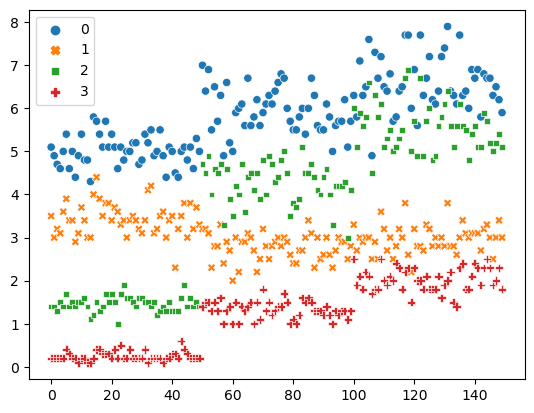

In [256]:
##plotando gráfico sem redução e sem fit
df = pd.DataFrame(iris.data)
sns.scatterplot(df)
plt.show()

In [257]:
## redução de dimensionalidade
pca = PCA(n_components=2)

In [258]:
## treinamento dos dados
pca.fit(X)

PCA(n_components=2)

In [283]:
## imprimindo dados das principais features
print("NOME DAS FEATURE:\n",iris.feature_names,"\n")
feature=[]
print("NOME DAS FEATURE MAIS EXPRESSIVAS:")
for i in iris.feature_names:
    if i!='sepal width (cm)':
        feature.append(i)

for pos,i in enumerate(feature):
    print(pos," - ",i)
    
print("\nFEACTURES ESCOLHIDAS:")    
for posI,i in enumerate(pca.components_):
    print("PCA [",posI,"]: \n")
    maior=-100000
    posMaior=-1
    menor=100000
    posMenor=-1
    for posJ,j in enumerate(i):
       print(f"{j:.2f}  ",end=" ")
       if j>maior:
           maior=j
           posMaior=posJ
       if j<menor:
           menor=j
           posMenor=posJ
        
    print(f"\nFEATURE MAIOR: {feature[posMaior]:10s} = {maior:.4f}")
    print(f"FEATURE MENOR: {feature[posMenor]:10s} = {menor:.4f}") 

NOME DAS FEATURE:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

NOME DAS FEATURE MAIS EXPRESSIVAS:
0  -  sepal length (cm)
1  -  petal length (cm)
2  -  petal width (cm)

FEACTURES ESCOLHIDAS:
PCA [ 0 ]: 

0.36   -0.08   0.86   0.36   
FEATURE MAIOR: petal width (cm) = 0.8567
FEATURE MENOR: petal length (cm) = -0.0845
PCA [ 1 ]: 

0.66   0.73   -0.17   -0.08   
FEATURE MAIOR: petal length (cm) = 0.7302
FEATURE MENOR: petal width (cm) = -0.1734


In [231]:
## transformando os componentes nas features principais
Z = pca.transform(X)

In [72]:
## mostrando que agora só tem 2 componentes
Z.shape

(150, 2)

In [247]:
## taxa de variação explicada (quantos % foi preservado dos dados)
print (pca.explained_variance_ratio_)
S=sum(pca.explained_variance_ratio_)*100
print(f"{S:.2f}%")

[0.92461872 0.05306648]
97.77%


In [75]:
## Valor de cada componente principal

In [76]:
pca.singular_values_

array([25.09996044,  6.01314738])

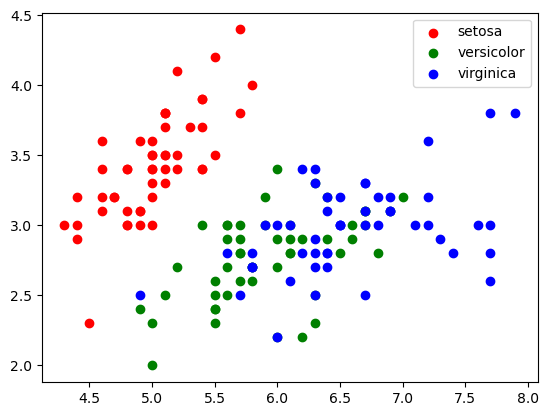

In [200]:
## gráfico sem normalização
colors = 'rgb'
target= range(len(iris.target_names))
plt.figure()
for i, c, label in zip (target, colors, iris.target_names):
    plt.scatter(X[iris.target == i, 0], X[iris.target == i, 1], c=c, label=label)    
plt.legend()
plt.show()

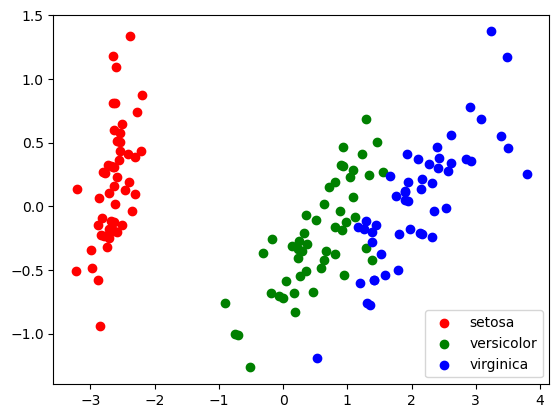

In [201]:
## gráfico normalizado
colors = 'rgb'
target= range(len(iris.target_names))
plt.figure()
for i, c, label in zip (target, colors, iris.target_names):
    plt.scatter(Z[iris.target == i, 0], Z[iris.target == i, 1], c=c, label=label)    
plt.legend()
plt.show()